#### Project Goals
Create several data visualizations that will give you insight into the world of roller coasters.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# load rankings data here:
df1 = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
df2 = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

'''print(df1.columns)
print(df1.shape)
print(df2.columns)
print(df2.shape)
print(df1)'''

#How many roller coasters are included in each ranking dataset
roller_numbers1 = df1.groupby('Name').Rank.count().reset_index()
display(roller_numbers1.head()) #Answer-61 roller coasters

#How many different roller suppliers are included in the rankings?
roller_suppliers1 = df1.groupby('Supplier').Rank.count().reset_index()
display(roller_suppliers1.head()) #Answer-32 roller coaster suppliers

#Do some years include more rankings than other years?
year_ranks1 = df1.groupby('Year of Rank').Rank.count().reset_index()
display(year_ranks1.head()) #Answer- years 2016,2017,2018 have 40 more rankings than previous years.

,Name,Rank
0,American Thunder,3
1,Balder,4
2,Beast,2
3,Blue Streak,6
4,Boardwalk Bullet,3


,Supplier,Rank
0,Allen/PTC,1
1,CCI,4
2,Custom Coasters,25
3,Dinn-PTC/Schmeck,2
4,Dinn/PTC-Schmeck,3


,Year of Rank,Rank
0,2013,10
1,2014,10
2,2015,10
3,2016,50
4,2017,50


###### Function 1
Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

Since “El Toro” is not a unique roller coaster name, the plot generated by your function will show multiple rankings for a given year. To fix this issue, we added an additional argument park_name to our function that allows us to differentiate between roller coasters of the same name at different amusement parks.

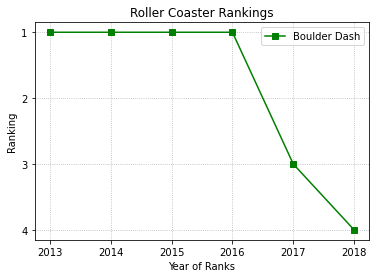

None


In [19]:
def coaster_rankings(name, park, data):
  funcdf = data[(data.Name == name) & (data.Park == park)]
  ax=plt.subplot()
  plt.plot(funcdf['Year of Rank'], funcdf['Rank'], marker='s', color='green', label=name)
  plt.xlabel('Year of Ranks')
  plt.ylabel('Ranking')
  plt.title('Roller Coaster Rankings')
  ax.set_yticks([1, 2, 3, 4])
  ax.invert_yaxis()
  plt.legend()
  plt.grid(linestyle=':')
  plt.show()

#testing Function
print(coaster_rankings('Boulder Dash', 'Lake Compounce', df1))

###### Function 2
Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as one roller coaster name, “Boulder Dash“ as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

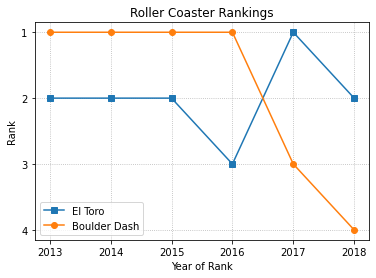

None


In [18]:
def coaster2_ranking(name1, name2, park1, park2, data1):
  func1 = data1[(data1.Name == name1) & (data1.Park == park1)]
  func2 = data1[(df1.Name == name2) & (data1.Park == park2)]
  plt.close()
  ax=plt.subplot()
  plt.plot(func1['Year of Rank'], func1['Rank'], marker='s', label=name1)
  plt.plot(func2['Year of Rank'], func2['Rank'], marker='o', label=name2)
  plt.xlabel('Year of Rank')
  plt.ylabel('Rank')
  plt.title('Roller Coaster Rankings')
  ax.set_yticks([1, 2, 3, 4])
  ax.invert_yaxis()
  plt.grid(linestyle=':')
  plt.legend()
  plt.show()

#testing function
print(coaster2_ranking('El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce', df1))

###### Function 3

\Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower.

Call your function with a value for n and either the wood ranking or steel ranking DataFrame.


Our function selected all rows from the ranking DataFrame that have a rank less than or equal to n.

`top_n_rankings = rankings_df[rankings_df['Rank'] <= n]`
We then created a figure on which to plot. After creating the figure, we iterated through each unique coaster in our top_n_rankings DataFrame as used each coaster to filter top_n_rankings by that coaster and plot the ranking over time.

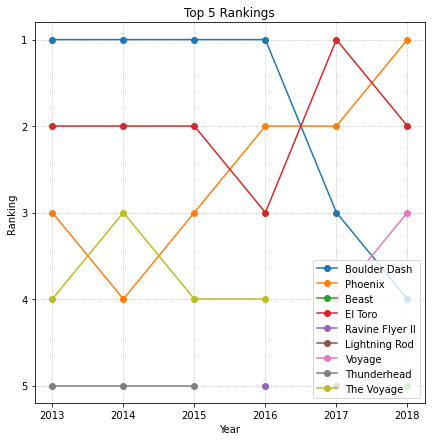

In [21]:
def plot_top_n(rankings_df,n):
  top_n_rankings = rankings_df[rankings_df['Rank'] <= n]
  plt.close()
  fig, ax = plt.subplots(figsize=(7,7))
  for coaster in set(top_n_rankings['Name']):
    coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster, marker='o')
  ax.set_yticks([i for i in range(1,6)])
  ax.invert_yaxis()
  plt.title("Top {} Rankings".format(n))
  plt.grid(linestyle=':')
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=4)
  plt.show()

plot_top_n(df1,5)

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [6]:
df3 = pd.read_csv('roller_coasters.csv')

print(df3.shape)
print(df3.columns)
print(df3.dtypes)

(2802, 10)
Index(['name', 'material_type', 'seating_type', 'speed', 'height', 'length',
       'num_inversions', 'manufacturer', 'park', 'status'],
      dtype='object')
name               object
material_type      object
seating_type       object
speed             float64
height            float64
length            float64
num_inversions    float64
manufacturer       object
park               object
status             object
dtype: object


###### Function 4
Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and one of the column names.

Our function uses `plt.hist()` to plot a histogram. We also used the pandas function `.dropna()` to remove all missing values before plotting the histogram.

Plotting a histogram of `“height”` is tricky since there are some outliers that skew the data. We also made a separate function that creates a histogram of height and used the following code to remove the outliers.

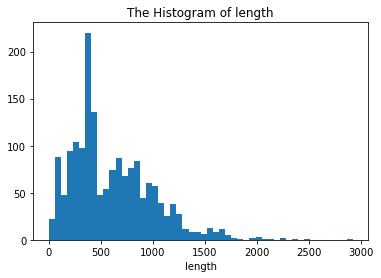

None


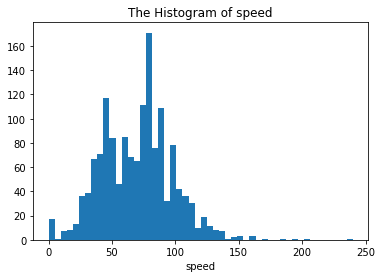

None


In [15]:
def histogram1(data2, col_name):
  data2 = data2[col_name].dropna()
  plt.close()
  plt.hist(data2, bins=50)
  plt.title('The Histogram of {}'.format(col_name))
  plt.xlabel('{}'.format(col_name))
  plt.show()
  
#testing the function

print(histogram1(df3, 'length'))
plt.clf()
print(histogram1(df3, 'speed'))

###### Funtion 5
Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and an amusement park name.

Our function selects the rows of the roller coaster DataFrame that belong to the desired park.

`park_coasters = coaster_df[coaster_df['park'] == park_name]`

While not necessary to complete the task, we then sorted the DataFrame containing the roller coasters at the desired park by the number of inversions in descending order.

`park_coasters = park_coasters.sort_values('num_inversions', ascending=False)`

We could then grab the roller coaster names and number of inversions to use in creating the bar graph.

`coaster_names = park_coasters['name']
number_inversions = park_coasters['num_inversions']`


`plt.bar(_________,_________)`

C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


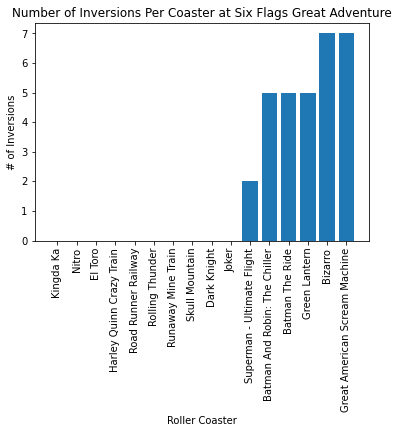

None


In [36]:
def plot_inversions_by_coaster(coaster_df, park_name):
  park_coasters = coaster_df[coaster_df['park'] == park_name]
  park_coasters = park_coasters.sort_values('num_inversions', ascending=True)
  coaster_names = park_coasters['name']
  number_inversions = park_coasters['num_inversions']
  plt.close()
  plt.bar(range(len(number_inversions)),number_inversions)
  ax = plt.subplot()
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names,rotation=90)
  plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
  plt.xlabel('Roller Coaster')
  plt.ylabel('# of Inversions')
  plt.show()

#testing the function
print(plot_inversions_by_coaster(df3, 'Six Flags Great Adventure'))

###### Function 6
Write a function that creates a pie chart that compares the number of operating roller coasters `('status.operating')` to the number of closed roller coasters `('status.closed.definitely')`. Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame.

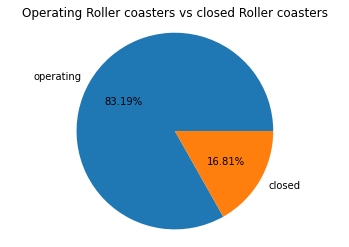

None


In [38]:
# function to plot pie chart of operating status
def pie_chart(data4):
  func4 = data4[data4.status == 'status.operating']
  func5 = data4[data4.status == 'status.closed.definitely']
  statusop_count = len(func4)
  statuscl_count = len(func5)
  status_count = [statusop_count, statuscl_count]
  plt.close()
  plt.pie(status_count, labels=['operating', 'closed'], autopct='%0.2f%%')
  plt.axis('equal')
  plt.title('Operating Roller coasters vs closed Roller coasters')
  plt.show()

#testing the function
print(pie_chart(df3))


###### Function 7
`.scatter()` is another useful function in matplotlib that you might not have seen before. .scatter() produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between to variables.

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and two-column names.

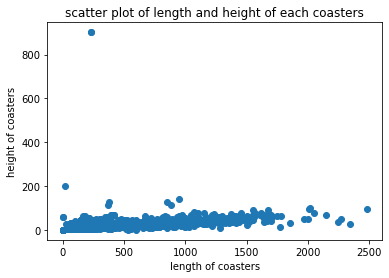

None


In [7]:
#function to plot scatter of any 2 columns
def scatter_plt(data5, col1, col2):
  plt.close()
  plt.scatter(data5[col1], data5[col2])
  plt.xlabel('{} of coasters'.format(col1))
  plt.ylabel('{} of coasters'.format(col2))
  plt.title('scatter plot of {} and {} of each coasters'.format(col1, col2))
  plt.show()
print(scatter_plt(df3, 'length','height'))

Our function uses `plt.scatter()` to create the scatter plot.

Plotting a scatter plot of “speed” vs “height” is tricky since there are some outliers that skew the data. We also made a separate function that specifically creates a scatter plot of “speed” vs “height” and used the following code to remove the “height” outliers.

`coaster_df = coaster_df[coaster_df['height'] < 140]`
With the outliers removed, we could create the scatter plot and better visualize the relationship between “height” and “speed”.

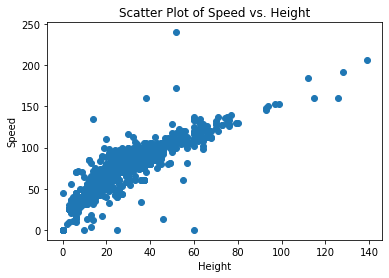

In [5]:
# function to plot scatter of speed vs height
def plot_scatter_height_speed(coaster_df):
  coaster_df = coaster_df[coaster_df['height'] < 140]
  plt.scatter(coaster_df['height'],coaster_df['speed'])
  plt.title('Scatter Plot of Speed vs. Height')
  plt.xlabel('Height')
  plt.ylabel('Speed')
  plt.show()

plot_scatter_height_speed(df3)

##### Fun

Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

Some questions you might want to answer with the datasets provided include:

-What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
-Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)?
-Do amusement parks have any specialties?
-What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

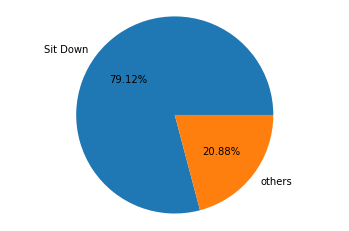

None


In [8]:
#function plotting a pie chart comparing sitting type that's mostly used
def seating(data6, type1):
  func8 = data6[data6.seating_type == type1]
  func9 = data6[data6.seating_type != type1]
  len8 = len(func8)
  len9 = len(func9)
  func15 = [len8, len9]
  plt.close()
  plt.pie(func15, labels=[type1, 'others'], autopct='%0.2f%%')
  plt.axis('equal')
  
  plt.show()
print(seating(df3, 'Sit Down'))